# About Dataset
### Context

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.


### Content
Each app (row) has values for catergory, rating, size, and more.

### Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


## 1.0 About Author¶
Project: Google PLay store apps


Author:Zain Shah

​
Code Submission Date: 13-07-2024

​
Email:zainshah.5109@gmail.com

​
linkdn: www.linkedin.com/in/syed-zayn-shah-naqvi-a2a7772a2

​
Github:Syed-Zayn

​
## 2.0 About Data
The dataset provide latest statistical global data on covid 19- the total cases, death counts, recovered number of patients in a country-wise format, which makes it suitable for data analytics and clustering. The dataset has been updated up until 2024. The available file is in CSV format.

​
Data: google-play-store-apps.csv


Dataset: https://www.kaggle.com/datasets/lava18/google-play-store-apps/versions/6
​

## 2.1 Task:
We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of 
data cleaning and normalization. During the coding process, we will document our observations. Ultimately, we will produce a summary and draw conclusions from our findings
​
## 2.2 Objectives:
The primary aim of this project is to conduct a thorough analysis of the dataset to identify significant insights. The ultimate goal is to project and emphasize customer dynamics and demands to developers and other relevant stakeholders. This will assist in driving more business towards their upcoming applications.

​
Kernel Version Used:

Python 3.12.0
​
## 3.0 Import Libraries
We will use the follwoing libraries

​
Pandas: Data manipulation and analysis library.

​
Numpy: Numerical computing library.

​
Matplotlib: Data visualization library.
​

Seaborn: Statistical data visualization library.


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
warnings.filterwarnings('ignore') 

# Reading file ,Cleaning and Exploring Data

In [3]:
df=pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.shape

(10841, 13)

In [8]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
a=df['Price']=='0'
df[a].groupby('Type').size()

Type
Free    10039
dtype: int64

In [11]:
df['Price']=df['Price'].apply(lambda x: x.replace('$',''))

In [12]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

In [13]:
df.describe()

,Rating,Price
count,9367.000000,10840.000000
mean,4.193338,1.027368
std,0.537431,15.949703
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,19.000000,400.000000


In [14]:
df.sample(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3334,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0.00,Everyone,Tools,"August 6, 2018",6.06.14,4.4 and up
1193,Grubhub: Food Delivery,FOOD_AND_DRINK,4.5,155944,35M,"5,000,000+",Free,0.00,Everyone,Food & Drink,"August 2, 2018",7.12,5.0 and up
647,Chat Click - Dating Search,DATING,NaN,4,3.8M,500+,Free,0.00,Mature 17+,Dating,"July 11, 2018",1.0,3.0 and up
2259,Diabetes & Diet Tracker,MEDICAL,4.6,395,19M,"1,000+",Paid,9.99,Everyone,Medical,"July 16, 2018",6.5.1,5.0 and up


In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
def convert(value):
    if isinstance (value,str):
        if 'k' in value:
            return float(value.replace('k',''))*1024
        if 'M' in value:
            return float(value.replace('M',''))*1024*1024
        if 'Varies with device':
            return np.nan
        return value

In [17]:
df['Size']=df['Size'].apply(convert)

In [18]:
df['Size']=pd.to_numeric(df['Size'],errors='coerce')

In [19]:
df['Size In Mbs']=df['Size'].apply(lambda x: x/(1024 * 1024))

In [20]:
df['Size in Kbs']=df['Size'].apply(lambda x: x/1024)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size In Mbs,Size in Kbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


In [22]:
df.describe()

,Rating,Size,Price,Size In Mbs,Size in Kbs
count,9367.000000,9.145000e+03,10840.000000,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.027368,21.516165,22032.553406
std,0.537431,2.368637e+07,15.949703,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000,0.008301,8.500000
25%,4.000000,5.138022e+06,0.000000,4.900000,5017.600000
50%,4.300000,1.363149e+07,0.000000,13.000000,13312.000000
75%,4.500000,3.145728e+07,0.000000,30.000000,30720.000000
max,19.000000,1.048576e+08,400.000000,100.000000,102400.000000


In [23]:
df['Installs']=df['Installs'].apply(lambda x:x.replace("+",'') if '+' in str(x) else x)

In [24]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

In [25]:
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')

In [26]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1696
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Size In Mbs       1696
Size in Kbs       1696
dtype: int64

In [27]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size In Mbs,Size in Kbs
9832,Lettre et demande d'emploi,FAMILY,4.6,302,10380902.4,100000.0,Free,0.0,Everyone,Education,"January 2, 2018",1.0,4.0 and up,9.9,10137.6


In [28]:
df.groupby('Type')['Installs'].size()

Type
0           1
Free    10039
Paid      800
Name: Installs, dtype: int64

In [29]:
df.drop(df[df['Type']=='0'].index,axis=0,inplace=True)

In [30]:
df.groupby('Type')['Installs'].size()

Type
Free    10039
Paid      800
Name: Installs, dtype: int64

In [31]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Size In Mbs       1695
Size in Kbs       1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [32]:
a=df.isnull().sum()/len(df)*100
a.sort_values(ascending=False)

Size              15.636531
Size In Mbs       15.636531
Size in Kbs       15.636531
Rating            13.597786
Current Ver        0.073801
Android Ver        0.018450
Type               0.009225
App                0.000000
Category           0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

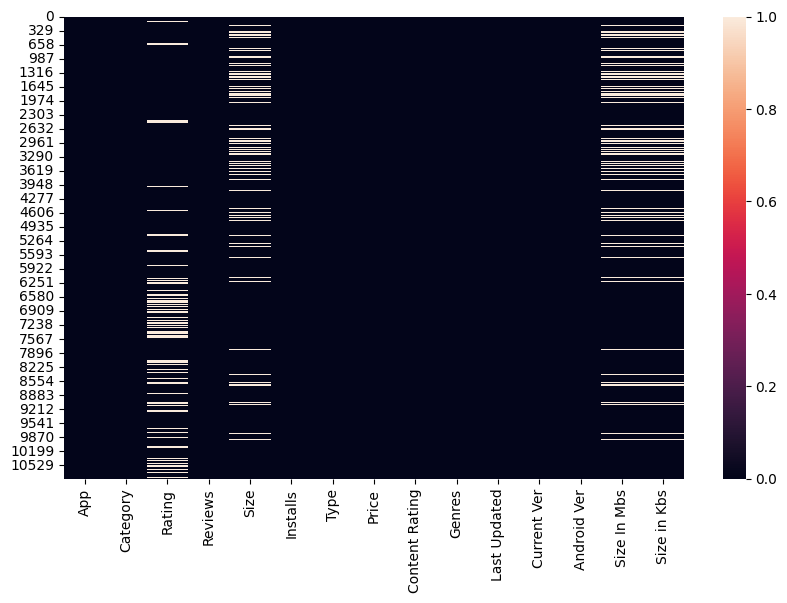

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

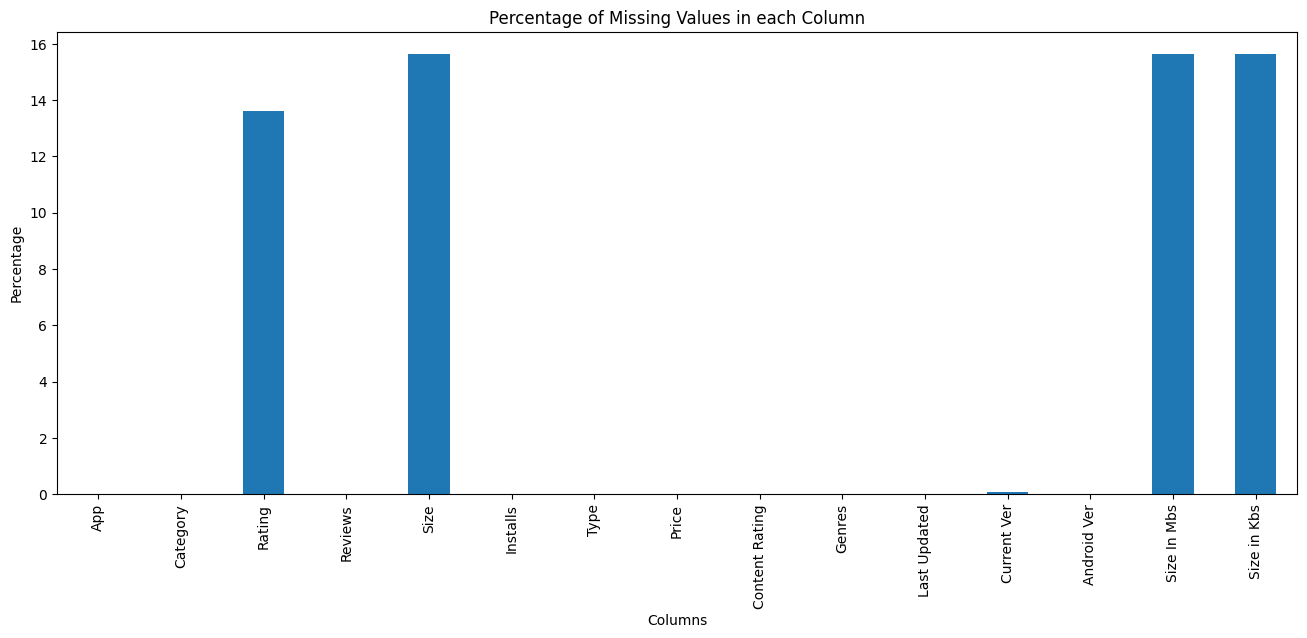

In [34]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')
plt.show()

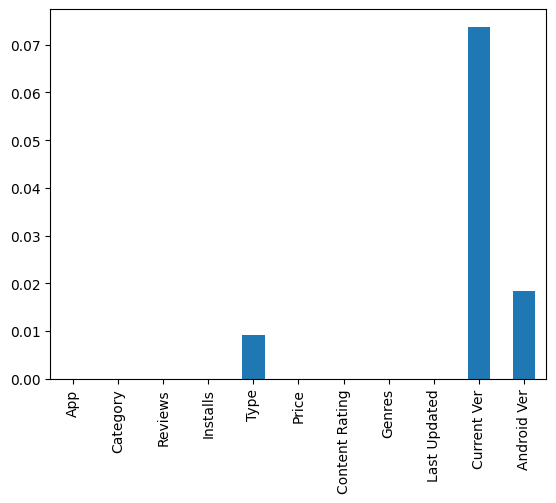

In [35]:
missing_percentage[missing_percentage <1].plot(kind='bar')
plt.show()

In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size In Mbs,Size in Kbs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


In [37]:
df['Size'].max()
ma=df['Size']==104857600.0
df[ma].groupby('App').size()


App
Car Crash III Beam DH Real Damage Simulator 2018    1
Draft Simulator for FUT 18                          1
Gangster Town: Vice District                        1
Hungry Shark Evolution                              3
Miami crime simulator                               1
Mini Golf King - Multiplayer Game                   1
Navi Radiography Pro                                1
Post Bank                                           1
SimCity BuildIt                                     1
Stickman Legends: Shadow Wars                       1
Talking Babsy Baby: Baby Games                      1
The Walking Dead: Our World                         1
Ultimate Tennis                                     1
Vi Trainer                                          1
dtype: int64

In [38]:
df.describe()

,Rating,Size,Installs,Price,Size In Mbs,Size in Kbs
count,9366.000000,9.145000e+03,1.084000e+04,10840.000000,9145.000000,9145.000000
mean,4.191757,2.256133e+07,1.546434e+07,1.027368,21.516165,22032.553406
std,0.515219,2.368637e+07,8.502936e+07,15.949703,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,5.000000,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [39]:
df['Reviews'].max()
re=df['Reviews']=='9992'
df[re].groupby(['App','Type','Genres']).size()

App                     Type  Genres
GollerCepte Live Score  Free  Sports    1
dtype: int64

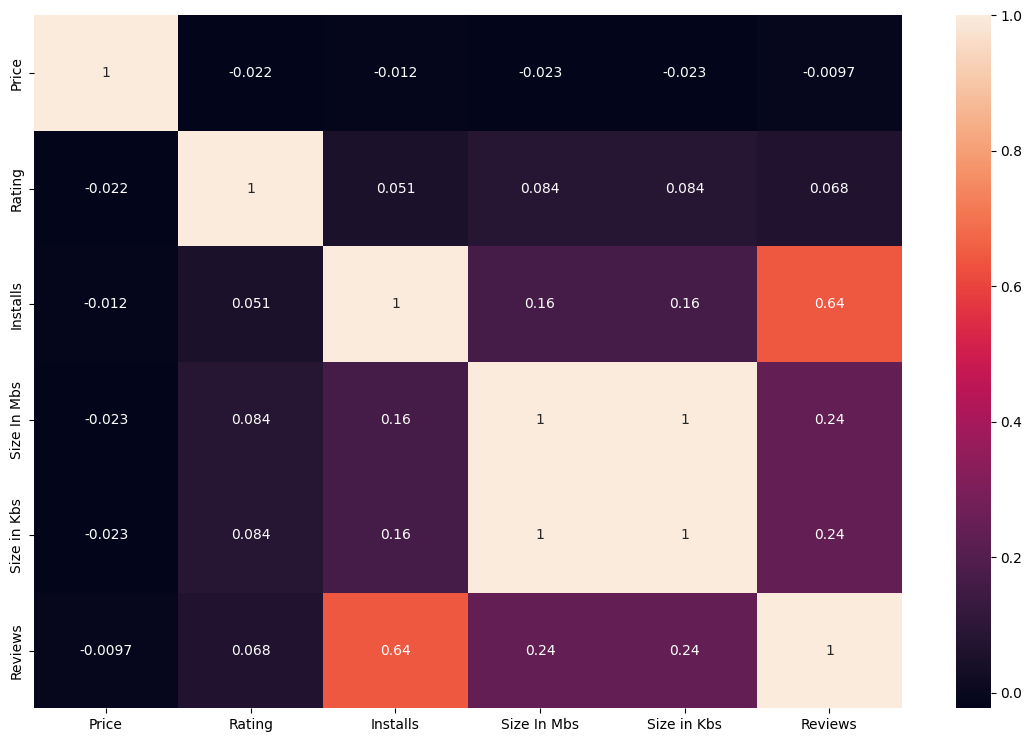

In [40]:
plt.figure(figsize=(14,9))
cor=df[['Price','Rating','Installs','Size In Mbs','Size in Kbs','Reviews']].corr()
sns.heatmap(cor,annot=True)
plt.show()

In [41]:
df.drop('Size',axis=1,inplace=True)

In [42]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size In Mbs       1695
Size in Kbs       1695
dtype: int64

In [43]:
df.dropna(subset=['Current Ver','Android Ver','Type'],inplace=True)

In [44]:
df.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size In Mbs       1694
Size in Kbs       1694
dtype: int64

In [45]:
d=df.groupby('Type')['Installs'].size()

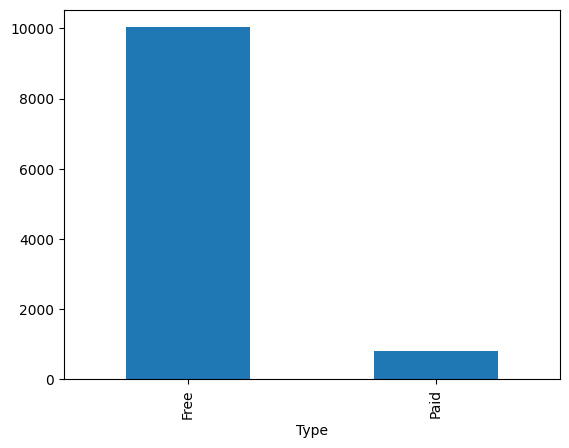

In [46]:
d.plot(kind='bar')
plt.show()

In [47]:
bins=[0.0,100000.0,1000000.0,10000000.0,100000000.0,1000000000.0]
labels=['low','medium','high','very high','top notch']
df['Install Conditions']=pd.cut(df['Installs'],bins=bins,labels=labels)

In [48]:
df['Install Conditions'].loc[df['Rating'].isnull()].value_counts()

Install Conditions
low          1452
medium          3
high            0
very high       0
top notch       0
Name: count, dtype: int64

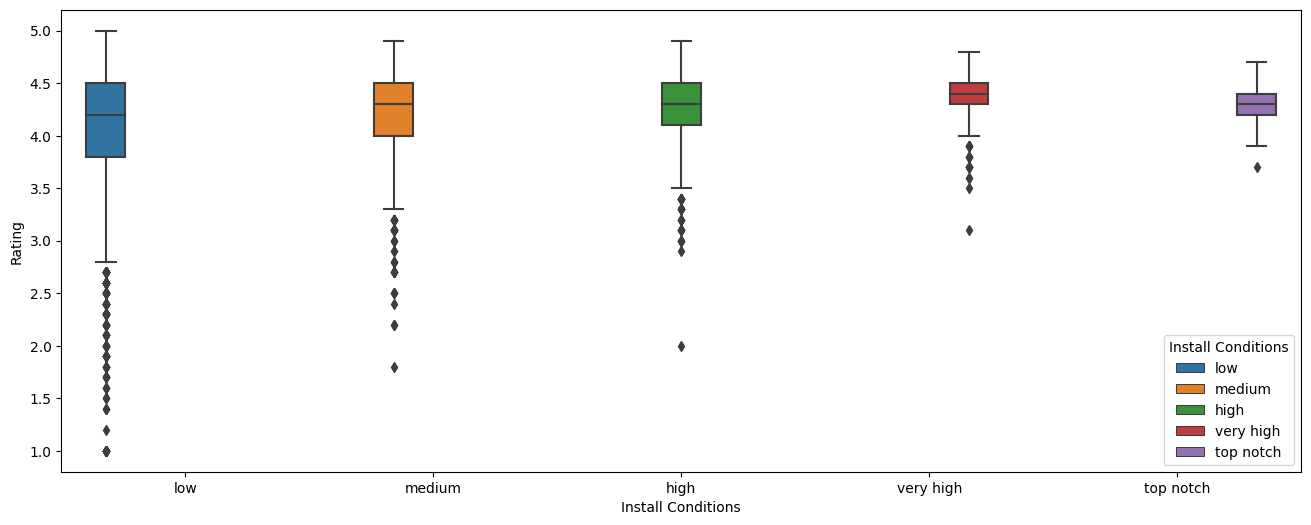

In [49]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Install Conditions',y='Rating',hue='Install Conditions',data=df)
plt.show()

In [50]:
df.groupby('Install Conditions')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Install Conditions,,,,,,,,
low,4415.0,4.106863,0.656404,1.0,3.8,4.2,4.5,5.0
medium,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
very high,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
top notch,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7


In [51]:
df.loc[df['Install Conditions']=='low','Rating']=4.106863

In [52]:
df.loc[df['Install Conditions']=='medium','Rating']=4.207525

In [53]:
df['Install Conditions'].loc[df['Rating'].isnull()].value_counts()

Install Conditions
low          0
medium       0
high         0
very high    0
top notch    0
Name: count, dtype: int64

In [54]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

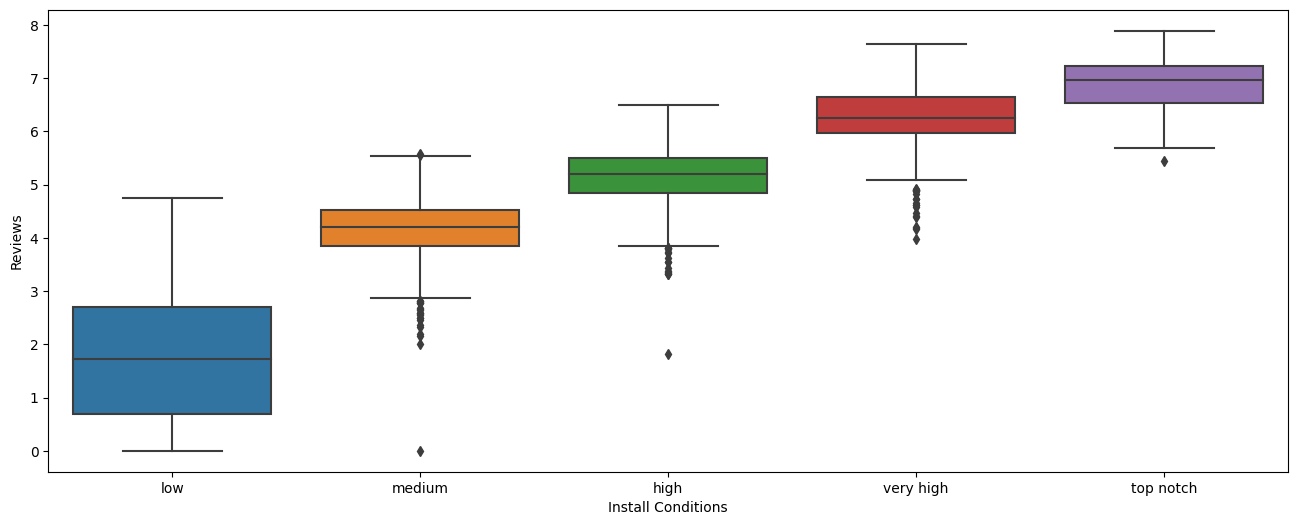

In [55]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Install Conditions',y=np.log10(df['Reviews']),data=df)
plt.show()

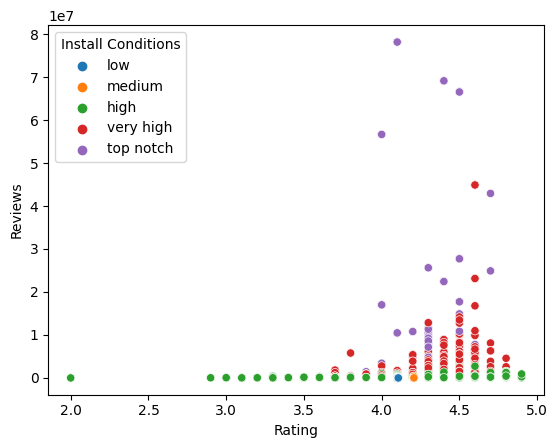

In [56]:
sns.scatterplot(x='Rating',y='Reviews',hue='Install Conditions',data=df)
plt.show()

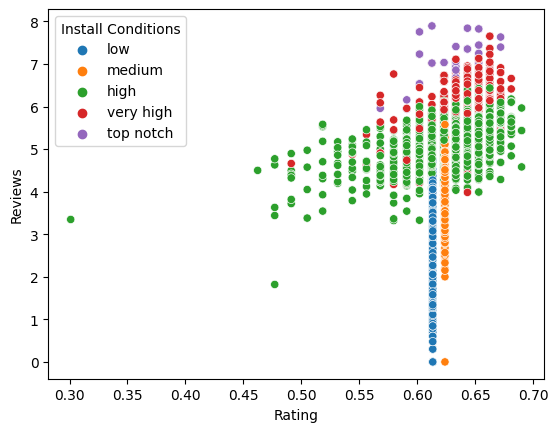

In [57]:
sns.scatterplot(x=np.log10(df['Rating']),y=np.log10(df['Reviews']),hue='Install Conditions',data=df)
plt.show()

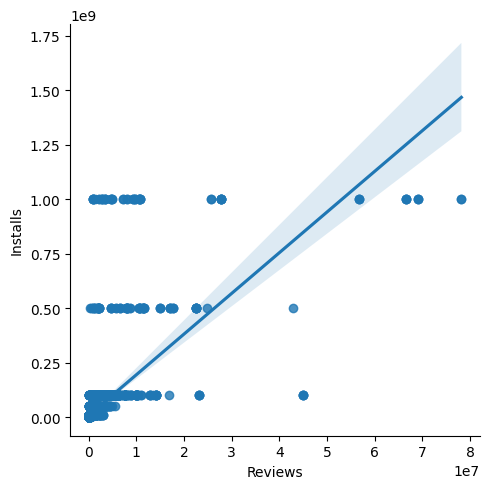

In [58]:
sns.lmplot(x='Reviews',y='Installs',data=df)
plt.show()

In [59]:
df.duplicated().sum()

483

In [60]:
df['App'].duplicated().sum()

1181

In [61]:
for col in df.columns:
    print("The dup values are:",df[col].duplicated().sum())

The dup values are: 1181
The dup values are: 10796
The dup values are: 10804
The dup values are: 4830
The dup values are: 10809
The dup values are: 10827
The dup values are: 10737
The dup values are: 10823
The dup values are: 10710
The dup values are: 9453
The dup values are: 7998
The dup values are: 10796
The dup values are: 10373
The dup values are: 10373
The dup values are: 10823


In [62]:
f=df[df['App'].duplicated(keep=False)].sort_values(by='App')

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.duplicated().sum()

0

# (2) Insights From Data
Generating Some qustions to increase Knowledge About Data

In [65]:
a=df.groupby('Category')['App'].size().sort_values(ascending=False)
a.head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: App, dtype: int64

In [66]:
a=df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
np.log10(a)

Category
GAME                   10.498917
COMMUNICATION          10.382958
SOCIAL                 10.097392
PRODUCTIVITY           10.095626
TOOLS                  10.058892
FAMILY                 10.001804
PHOTOGRAPHY             9.987722
TRAVEL_AND_LOCAL        9.803586
VIDEO_PLAYERS           9.793930
NEWS_AND_MAGAZINES      9.731848
SHOPPING                9.410499
ENTERTAINMENT           9.390168
PERSONALIZATION         9.316910
BOOKS_AND_REFERENCE     9.282502
SPORTS                  9.184287
HEALTH_AND_FITNESS      9.133865
BUSINESS                8.936345
FINANCE                 8.886687
MAPS_AND_NAVIGATION     8.859908
LIFESTYLE               8.728211
EDUCATION               8.727502
WEATHER                 8.629512
FOOD_AND_DRINK          8.411449
DATING                  8.314996
HOUSE_AND_HOME          8.097648
ART_AND_DESIGN          8.094587
LIBRARIES_AND_DEMO      7.792363
COMICS                  7.748856
AUTO_AND_VEHICLES       7.725342
MEDICAL                 7.625355
P

In [67]:
a=df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
a

Category
GAME                   1415536650
COMMUNICATION           601273552
SOCIAL                  533576829
FAMILY                  396771746
TOOLS                   273181033
PHOTOGRAPHY             204297410
VIDEO_PLAYERS           110380188
PRODUCTIVITY            102554498
SHOPPING                 94931162
PERSONALIZATION          75192744
SPORTS                   65322708
TRAVEL_AND_LOCAL         55565160
ENTERTAINMENT            47570716
NEWS_AND_MAGAZINES       38245873
HEALTH_AND_FITNESS       30845186
MAPS_AND_NAVIGATION      30659254
EDUCATION                23165500
BOOKS_AND_REFERENCE      21873219
FINANCE                  16999891
WEATHER                  14604735
LIFESTYLE                12820575
BUSINESS                 12358171
FOOD_AND_DRINK            7671576
DATING                    5545397
COMICS                    3383276
HOUSE_AND_HOME            2794772
ART_AND_DESIGN            1714385
MEDICAL                   1396757
AUTO_AND_VEHICLES         1163666
LIBRA

In [68]:
a=df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
a

Category
GAME                   4.264557
EDUCATION              4.252075
PHOTOGRAPHY            4.235863
HEALTH_AND_FITNESS     4.221121
SHOPPING               4.219416
HOUSE_AND_HOME         4.196107
PRODUCTIVITY           4.193306
VIDEO_PLAYERS          4.193143
SOCIAL                 4.192825
COMMUNICATION          4.191928
WEATHER                4.190446
BOOKS_AND_REFERENCE    4.175640
PERSONALIZATION        4.175230
FOOD_AND_DRINK         4.174070
ART_AND_DESIGN         4.169480
MAPS_AND_NAVIGATION    4.168804
SPORTS                 4.168329
TRAVEL_AND_LOCAL       4.165105
ENTERTAINMENT          4.159439
FAMILY                 4.156561
TOOLS                  4.155844
FINANCE                4.155008
NEWS_AND_MAGAZINES     4.149993
COMICS                 4.144698
AUTO_AND_VEHICLES      4.144247
PARENTING              4.140144
BEAUTY                 4.138854
DATING                 4.133879
LIFESTYLE              4.133332
BUSINESS               4.129761
MEDICAL                4.116464

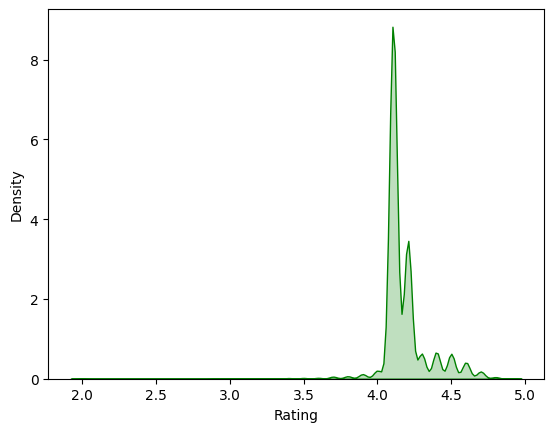

In [69]:

sns.kdeplot(df['Rating'],color='green',shade=True)
plt.show()

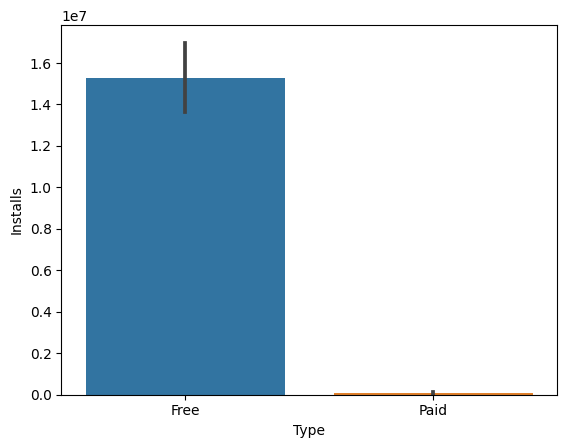

In [70]:
sns.barplot(x='Type',y='Installs',data=df)
plt.show()

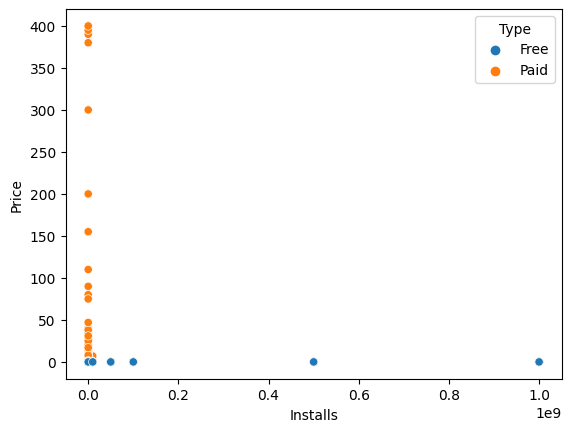

In [71]:
sns.scatterplot(x='Installs',y='Price',hue='Type',data=df)
plt.show()

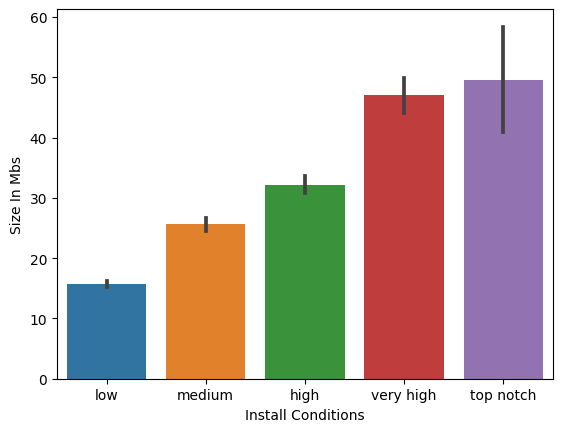

In [72]:
sns.barplot(x='Install Conditions',y='Size In Mbs',data=df)

plt.show()

In [73]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size In Mbs,Size in Kbs,Install Conditions
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.106863,159,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,low
1,Coloring book moana,ART_AND_DESIGN,4.207525,967,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0,very high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.106863,967,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2,low


In [74]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

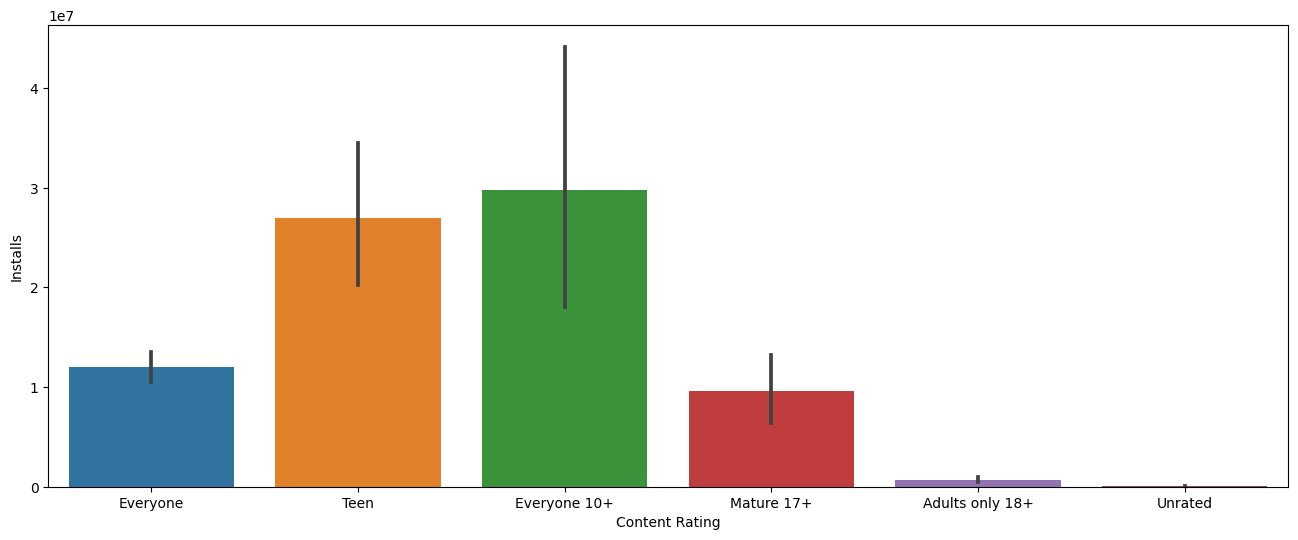

In [75]:
plt.figure(figsize=(16,6))
sns.barplot(x='Content Rating',y='Installs',data=df)
plt.show()

In [76]:
df['Category'].loc[df['Content Rating']=='Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

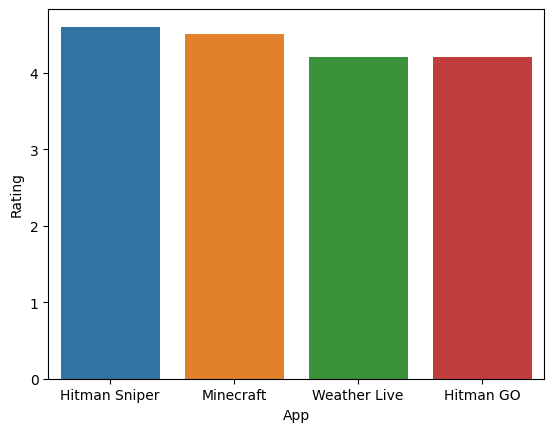

In [77]:
sns.barplot(x='App',y='Rating',data=df[df['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5))
plt.show()

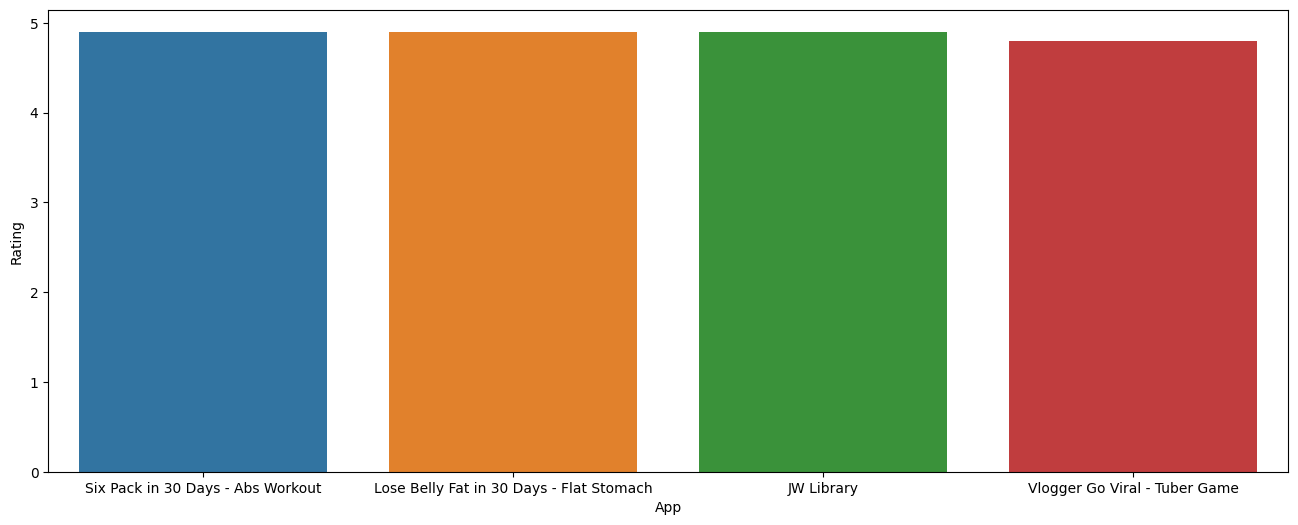

In [78]:
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=df[df['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5))
plt.show()

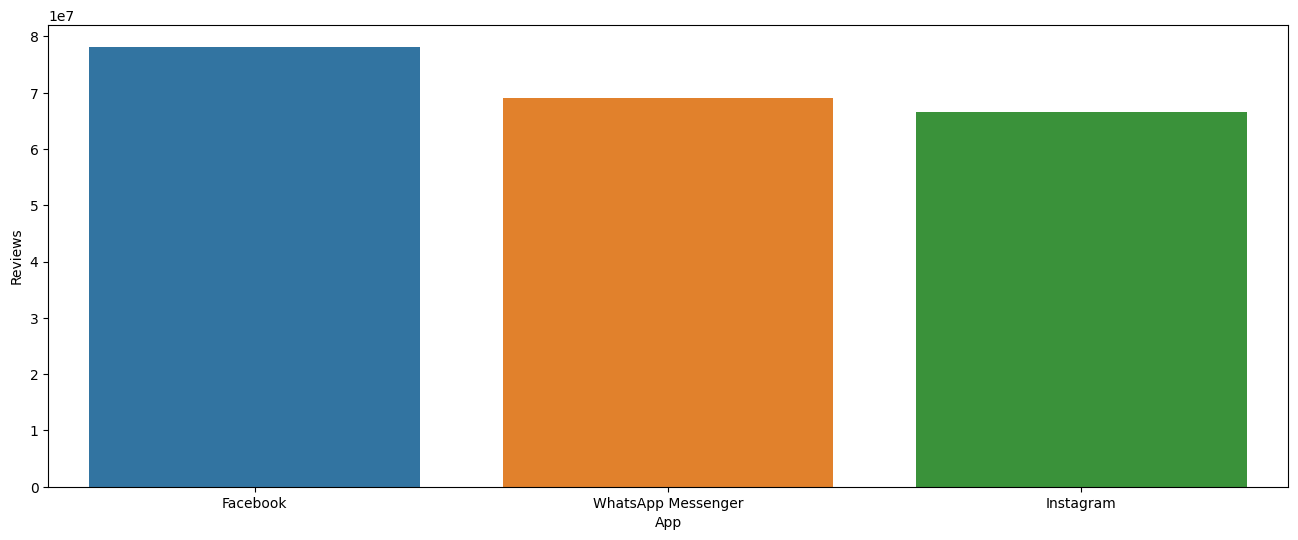

In [79]:
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Reviews',data=df[df['Type']=='Free'].sort_values(by='Reviews',ascending=False).head(5))
plt.show()

# (3)Conclusion:
We have made the following conclusions by analyzing this data
If downloads are increased ,reviews,rating also increased
free apps have the more downloads
family category has the most downloads
every10+ has the most downloads
etc...........
Thanks 